# Housing Dataset Regression - Analysis, Models and Explanation

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="whitegrid")
from scipy import stats
import numpy as np

In [3]:
%matplotlib inline

In [4]:
housing_df = pd.read_csv('housing_dataset.csv')

In [5]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing_df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [7]:
filtered_columns = [col for col in housing_df.columns if col.lower() not in ['id']]

In [8]:
housing_filtered = housing_df[filtered_columns]

<AxesSubplot:>

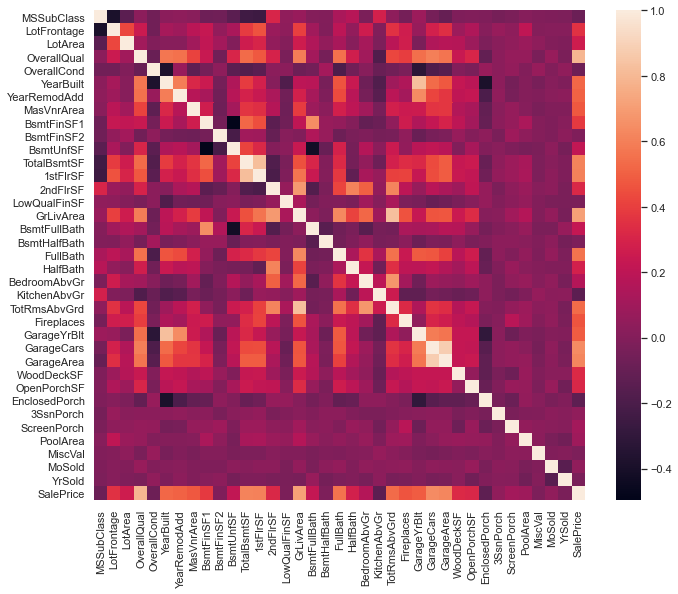

In [9]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(housing_filtered.corr())

## Correlation with target

In [10]:
correlation_data = housing_filtered.corr()

<AxesSubplot:>

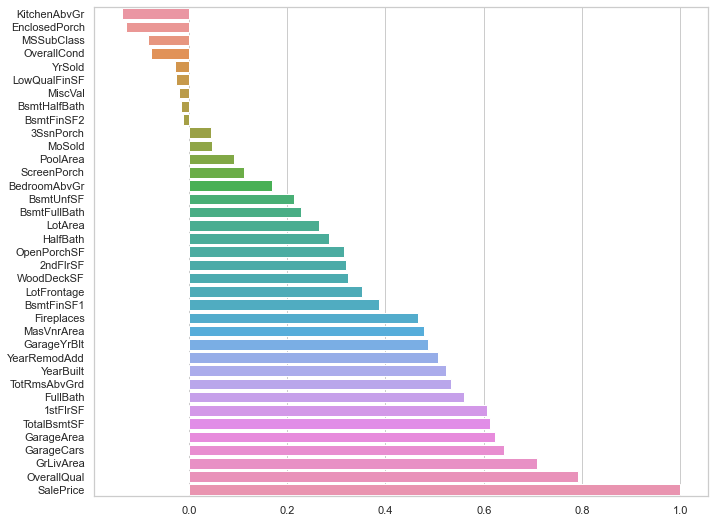

In [11]:
f, ax = plt.subplots(figsize=(11, 9))
sorted_corr = correlation_data['SalePrice'].sort_values()
sns.barplot(x=sorted_corr.values, y=sorted_corr.index.values)

In [12]:
housing_filtered.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Missing value counts by columns

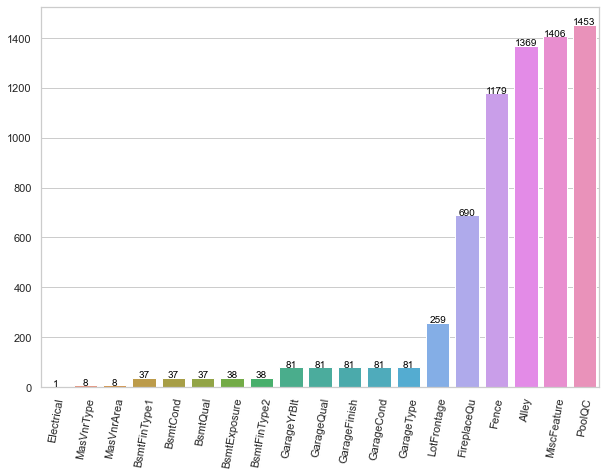

In [13]:
f, ax = plt.subplots(figsize=(10, 7))
missing_vals = housing_filtered.isnull().sum().sort_values()
missing_vals_reduced = missing_vals[missing_vals != 0]
p = sns.barplot(y = missing_vals_reduced.values, x=missing_vals_reduced.index.values, orient='v')
t = p.set_xticklabels(labels=missing_vals_reduced.index.values, rotation=80)
for index, item in enumerate(missing_vals_reduced.items()):
    p.text(index,item[1], item[1], color='black', ha="center")

In [14]:
cutoff = 0.4
columnswith_many_missing_values = missing_vals_reduced[missing_vals_reduced>cutoff*len(housing_df)].index.values
print (f"{columnswith_many_missing_values} have missing values for more {cutoff*100}% of the dataset")

['FireplaceQu' 'Fence' 'Alley' 'MiscFeature' 'PoolQC'] have missing values for more 40.0% of the dataset


## Sale Price Distribtion

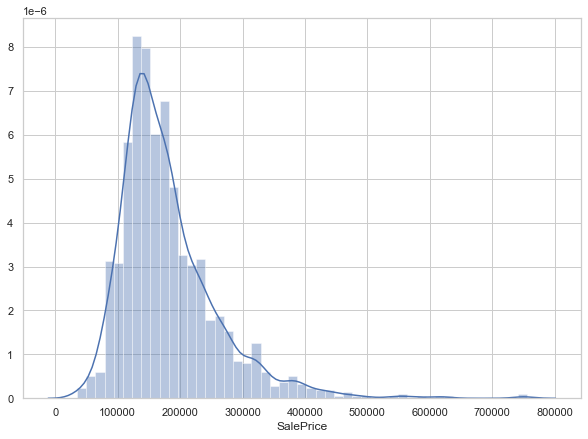

In [15]:
f, ax = plt.subplots(figsize=(10, 7))
g = sns.distplot(housing_df['SalePrice'])
# g.set_xticklabels(labels=[item.get_text() for item in g.xaxis.get_ticklabels()], rotation=45)

In [16]:
housing_df['SalePrice'].skew(), housing_df['SalePrice'].kurt()

(1.8828757597682129, 6.536281860064529)

# Categorical Features and Sale Price Relationship

Fetch all the columns which has unique values of less than 5% of the total data

In [17]:
categorical_features = [col for col in housing_filtered.columns if len(housing_df[col].unique()) < .05*len(housing_df)]

In [18]:
print(", ".join(categorical_features))

MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageQual, GarageCond, PavedDrive, 3SsnPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition


In [19]:
categorical_cols_with_text_type = housing_filtered.dtypes[housing_filtered.dtypes == 'object'].index.values

In [20]:
len(categorical_cols_with_text_type)

43

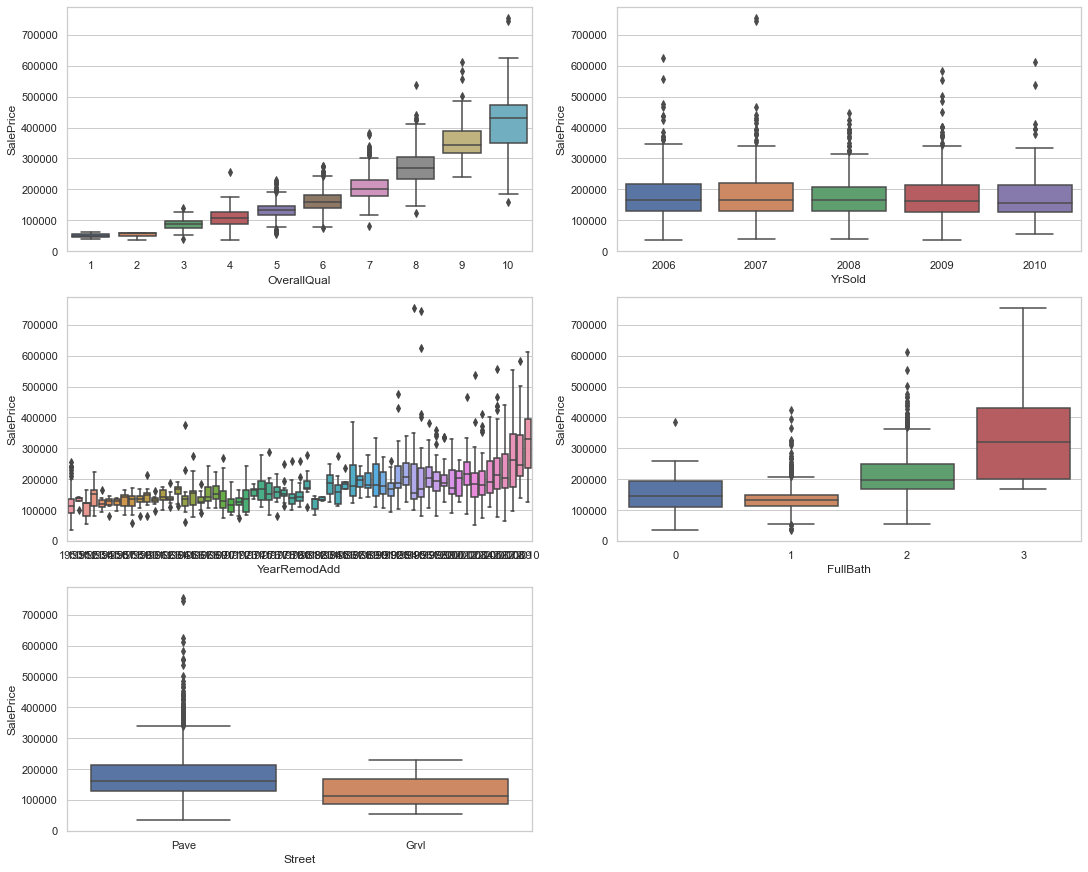

In [21]:
box_cat_cmp_fig = plt.figure(constrained_layout=True, figsize=(15,12))
grid = box_cat_cmp_fig.add_gridspec(3, 2, hspace=0.2, wspace=0.2)
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=housing_filtered, ax=plt.subplot(grid[0, 0]))
ax = sns.boxplot(x="YrSold", y="SalePrice", data=housing_filtered, ax=plt.subplot(grid[0, 1]))
ax = sns.boxplot(x="YearRemodAdd", y="SalePrice", data=housing_filtered, ax=plt.subplot(grid[1, 0]))
ax = sns.boxplot(x="FullBath", y="SalePrice", data=housing_filtered, ax=plt.subplot(grid[1, 1]))
ax = sns.boxplot(x="Street", y="SalePrice", data=housing_filtered, ax=plt.subplot(grid[2, 0]))

## Pariwise plot for highly correlated data (The below reflects only for numerical)

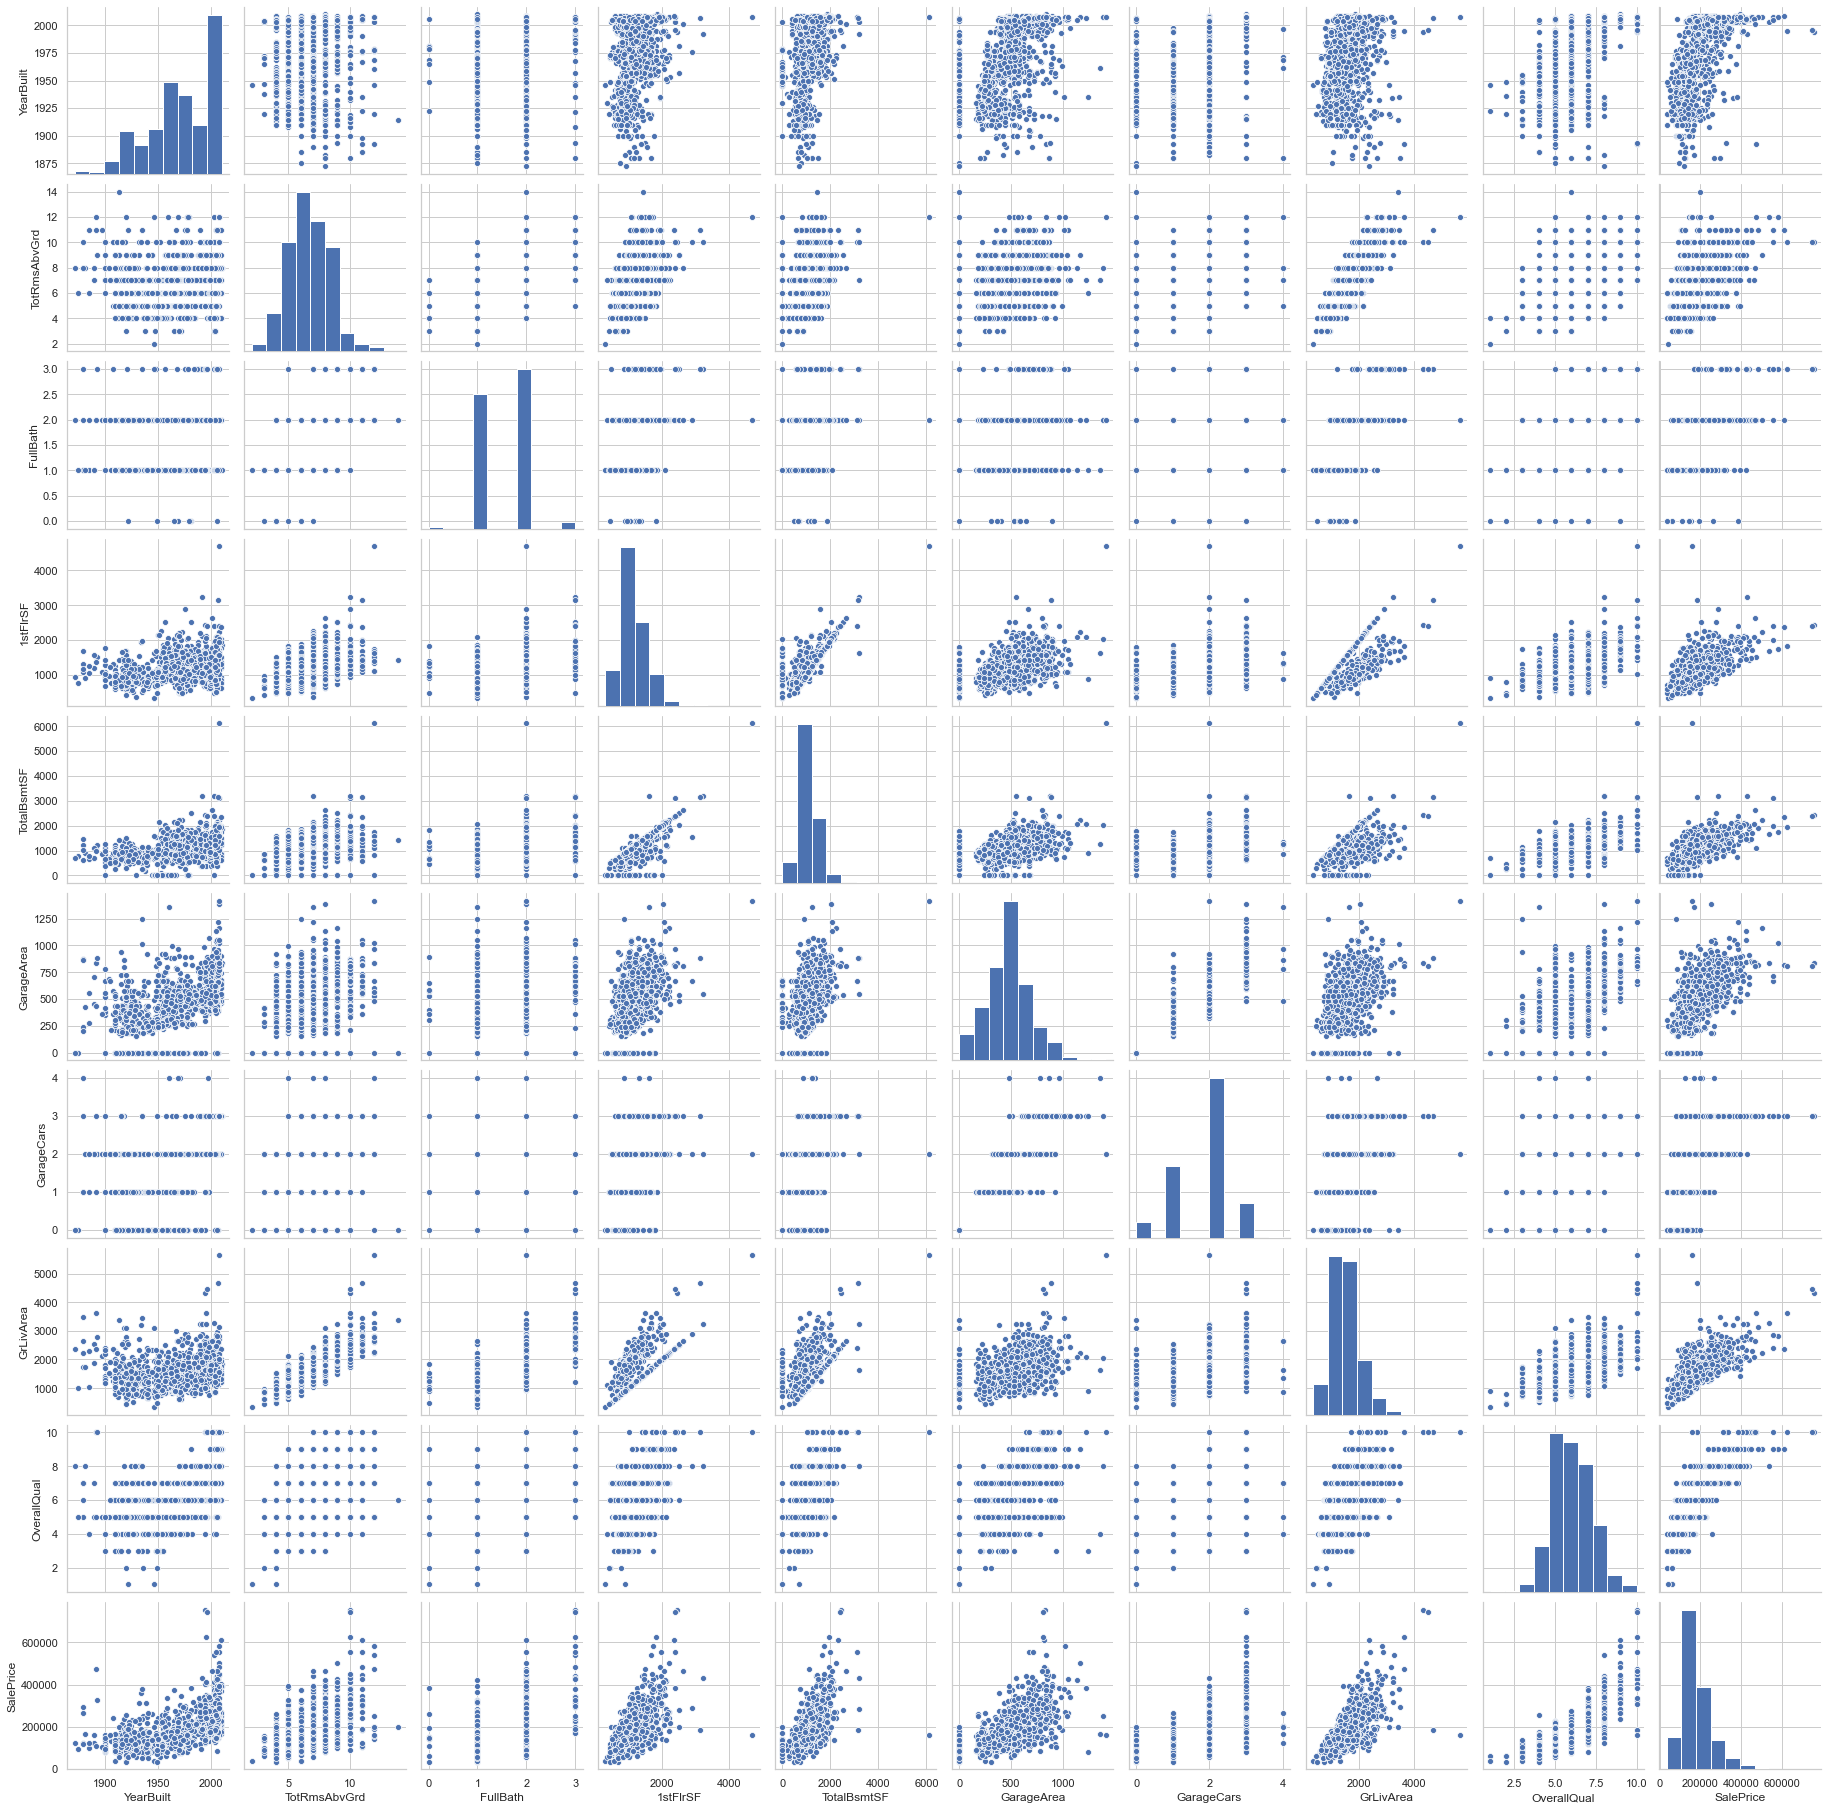

In [22]:
sns.pairplot(housing_filtered[sorted_corr.index.values[-10:]],height = 2.5)

## Further Sales Price analysis

<AxesSubplot:xlabel='SalePrice'>

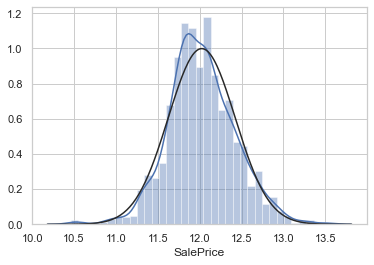

In [23]:
sns.distplot(np.log(housing_filtered['SalePrice']), fit=stats.norm)

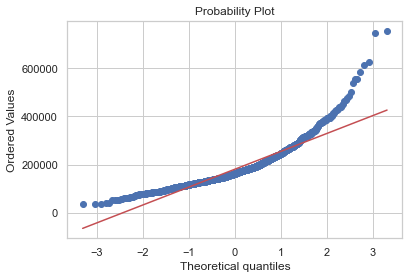

In [24]:
res = stats.probplot(housing_filtered['SalePrice'], plot=plt)

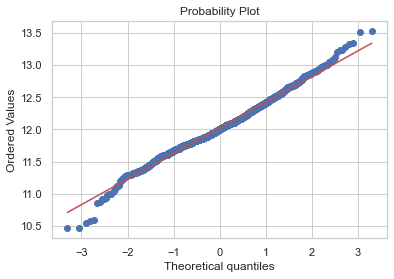

In [25]:
res_log = stats.probplot(np.log(housing_filtered['SalePrice']), plot=plt)

In [26]:
housing_filtered['log_sales'] = np.log(housing_filtered['SalePrice'])

# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.pipeline import Pipeline

In [28]:
le = defaultdict(LabelEncoder)

In [29]:
filter_colums = columnswith_many_missing_values.tolist()
low_correlation_cols = [items[0] for items in sorted_corr.items() if (items[1] < 0.4 and items[1] > -0.3)]
filter_colums += ['SalePrice', 'TotalBsmtSF']
filter_colums += low_correlation_cols

In [30]:
columnswith_many_missing_values

array(['FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'],
      dtype=object)

In [67]:
housing_filtered_2 = housing_filtered[[col for col in housing_filtered.columns if col not in filter_colums ]]

In [68]:
housing_filtered_2 = housing_filtered_2.dropna()

In [69]:
housing_encoded = housing_filtered_2.apply(lambda x: le[x.name].fit_transform(x) if x.name in categorical_features else x)

In [70]:
housing_encoded.count()

MSZoning         1338
Street           1338
LotShape         1338
LandContour      1338
Utilities        1338
LotConfig        1338
LandSlope        1338
Neighborhood     1338
Condition1       1338
Condition2       1338
BldgType         1338
HouseStyle       1338
OverallQual      1338
YearBuilt        1338
YearRemodAdd     1338
RoofStyle        1338
RoofMatl         1338
Exterior1st      1338
Exterior2nd      1338
MasVnrType       1338
MasVnrArea       1338
ExterQual        1338
ExterCond        1338
Foundation       1338
BsmtQual         1338
BsmtCond         1338
BsmtExposure     1338
BsmtFinType1     1338
BsmtFinType2     1338
Heating          1338
HeatingQC        1338
CentralAir       1338
Electrical       1338
1stFlrSF         1338
GrLivArea        1338
FullBath         1338
KitchenQual      1338
TotRmsAbvGrd     1338
Functional       1338
Fireplaces       1338
GarageType       1338
GarageYrBlt      1338
GarageFinish     1338
GarageCars       1338
GarageArea       1338
GarageQual

In [71]:
housing_encoded.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,log_sales
0,3,1,3,3,0,4,0,5,2,2,...,2003.0,1,1,548,4,4,2,8,4,12.247694
1,3,1,3,3,0,2,0,24,1,2,...,1976.0,1,1,460,4,4,2,8,4,12.109011
2,3,1,0,3,0,4,0,5,2,2,...,2001.0,1,1,608,4,4,2,8,4,12.317167
3,3,1,0,3,0,0,0,6,2,2,...,1998.0,2,2,642,4,4,2,8,0,11.849398
4,3,1,0,3,0,2,0,15,2,2,...,2000.0,1,2,836,4,4,2,8,4,12.429216


In [78]:
feature_cols = [col for col in housing_encoded.columns if col != 'log_sales']
trainx, testx, trainy, testy = train_test_split(housing_encoded[feature_cols],housing_encoded['log_sales'], random_state=21)

In [79]:
lin_model = Pipeline([('scale', MinMaxScaler()), 
                      ('model', LinearRegression())])

In [80]:
lin_model = lin_model.fit(trainx, trainy)

In [112]:
np.sqrt(metrics.mean_squared_error(testy, lin_model.predict(testx)))

0.15388484170153124

In [117]:
print (f"Log mean squared error : {np.sqrt( metrics.mean_squared_log_error(np.exp(testy), np.exp(lin_model.predict(testx))) )}")

Log mean squared error : 0.15388372495116312


In [82]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [83]:
metrics.explained_variance_score(y_true=testy, y_pred=lin_model.predict(testx))

0.8589172638657872

In [84]:
features_importance_lm_weights = [housing_encoded.columns[i]  for i in np.argsort(lin_model.steps[1][1].coef_)]
features_weights = [i  for i in np.sort(lin_model.steps[1][1].coef_)]

<AxesSubplot:>

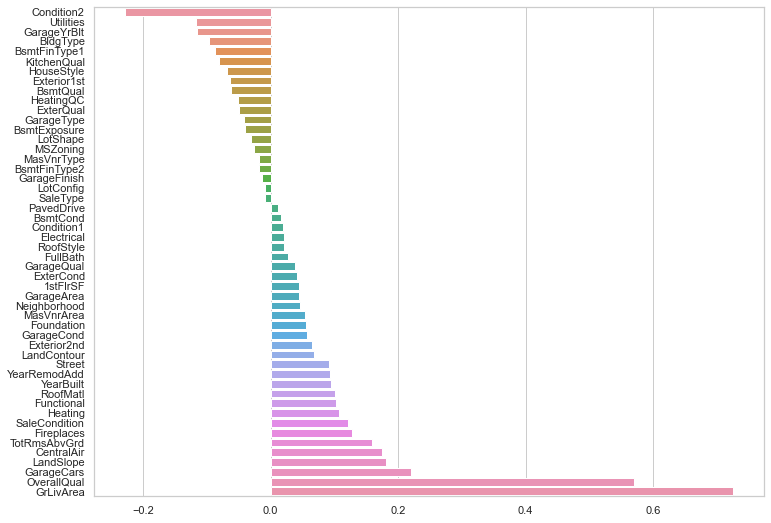

In [85]:
f, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x=features_weights, y=features_importance_lm_weights, orient='h')

## With Cross Validation

In [182]:
from sklearn.model_selection import StratifiedKFold, ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [138]:
cv = ShuffleSplit(n_splits=10, random_state=21)

In [162]:
trainx.values[train].shape

(902, 50)

In [167]:
error = 0
for i, (train, test) in enumerate(cv.split(trainx.values)):
    lin_model_cv = Pipeline([('scale', MinMaxScaler()), 
                      ('model', LinearRegression())])
    lin_model_cv.fit(trainx.values[train], trainy.values[train])
    error += np.sqrt( metrics.mean_squared_log_error(np.exp(trainy.values[test]), np.exp(lin_model_cv.predict(trainx.values[test]))) )
print (f"Average error is : {error/10}")

Average error is : 0.1416530200195592


In [197]:
from sklearn.linear_model import RidgeCV, LassoCV

In [198]:
ridge_cv = Pipeline([('scale', MinMaxScaler()), 
                      ('model', RidgeCV(cv=10, alphas=[0,1,10,15,500,1000,10000]))])

In [199]:
ridge_cv = ridge_cv.fit(trainx, trainy )

In [200]:
print (f"Log mean squared error : {np.sqrt( metrics.mean_squared_log_error(np.exp(testy), np.exp(ridge_cv.predict(testx))) )}")

Log mean squared error : 0.1560265394174065


In [193]:
# grid_ridge_cv = Pipeline([('scale', MinMaxScaler()), 
#                       ('model', RidgeCV(cv=10))])
# parameters={"model__alphas":[[0,1,10,15,500,1000,10000]]}
# grid_ridge_model = GridSearchCV(grid_ridge_cv, parameters)

In [201]:
# grid_ridge_model = grid_ridge_model.fit(trainx,trainy)

In [179]:
lasso_cv = Pipeline([('scale', MinMaxScaler()), 
                      ('model', LassoCV(cv=10))])

In [180]:
lasso_cv = lasso_cv.fit(trainx, trainy )

In [181]:
print (f"Log mean squared error : {np.sqrt( metrics.mean_squared_log_error(np.exp(testy), np.exp(lasso_cv.predict(testx))) )}")

Log mean squared error : 0.16110278824262234


In [204]:
from sklearn.linear_model import SGDRegressor

In [205]:
sgd = Pipeline([('scale', StandardScaler()), 
                      ('model', SGDRegressor())])

In [207]:
parameters={"model__alpha":[0.0001, 0.001, 0.01, 0.1, 0,1,10,15,500,1000,10000], "model__penalty":['l2', 'l1', 'elasticnet']}

In [211]:
grid_sgd_model = GridSearchCV(sgd, parameters)

In [212]:
grid_sgd_model = grid_ridge_model.fit(trainx, trainy)

In [213]:
grid_sgd_model.best_params_

{'model__alpha': 0.1, 'model__penalty': 'l2'}

In [214]:
print (f"Log mean squared error : {np.sqrt( metrics.mean_squared_log_error(np.exp(testy), np.exp(grid_sgd_model.predict(testx))) )}")

Log mean squared error : 0.15191926209468531


## Boosted Tree

In [86]:
import lightgbm

In [223]:
train_data = lightgbm.Dataset(trainx, label=trainy, categorical_feature=[cat for cat in categorical_features if cat in housing_encoded.columns])
test_data = lightgbm.Dataset(testx, label=testy)

In [224]:
parameters = {
    'application': 'regression_l2',
    'objective': 'regression',
    'metric': 'regression_l2',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 1
}

In [225]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

/Users/mayorao/opt/miniconda3/envs/stats/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/mayorao/opt/miniconda3/envs/stats/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood', 'OverallQual', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'TotRmsAbvGrd', 'Utilities', 'YearRemodAdd']
  warnings.

[LightGBM] [Warning] objective is set=regression, application=regression_l2 will be ignored. Current value: objective=regression
[LightGBM] [Warning] objective is set=regression, application=regression_l2 will be ignored. Current value: objective=regression
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 48
[LightGBM] [Warning] objective is set=regression, application=regression_l2 will be ignored. Current value: objective=regression
[LightGBM] [Info] Start training from score 12.059419
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 0.158502
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits w

In [103]:
metrics.explained_variance_score(y_true=testy, y_pred=model.predict(testx))

0.8671038162745888

In [118]:
print (f"Log mean squared error : {np.sqrt( metrics.mean_squared_log_error(np.exp(testy), np.exp(model.predict(testx))) )}")

Log mean squared error : 0.14945773552860264


In [104]:
import xgboost as xgb

In [105]:
xgb_model = xgb.XGBRegressor()

In [106]:
xgb_model.fit(trainx, trainy)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
y_pred = xgb_model.predict(testx)

In [108]:
metrics.explained_variance_score(y_true=testy, y_pred=xgb_model.predict(testx))

0.8585947794251683

In [119]:
print (f"Log mean squared error : {np.sqrt( metrics.mean_squared_log_error(np.exp(testy), np.exp(xgb_model.predict(testx))) )}")

Log mean squared error : 0.15413303801389058


## Use Optuna to tune XG-Boost